# Import of Python libraries needed in the experiement

In [1]:
import numpy as np
import tensorflow as tf
import tensorflow.keras as keras
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import StandardScaler

# Reading in the data goes here

In [2]:
file = "star_classification.csv"

# Examining the top 5 terms of the data and shape of table

In [3]:
df = pd.read_csv(file)
df.head()

,obj_ID,alpha,delta,u,g,r,i,z,run_ID,rerun_ID,cam_col,field_ID,spec_obj_ID,class,redshift,plate,MJD,fiber_ID
0,1.237661e+18,135.689107,32.494632,23.87882,22.27530,20.39501,19.16573,18.79371,3606,301,2,79,6.543777e+18,GALAXY,0.634794,5812,56354,171
1,1.237665e+18,144.826101,31.274185,24.77759,22.83188,22.58444,21.16812,21.61427,4518,301,5,119,1.176014e+19,GALAXY,0.779136,10445,58158,427
2,1.237661e+18,142.188790,35.582444,25.26307,22.66389,20.60976,19.34857,18.94827,3606,301,2,120,5.152200e+18,GALAXY,0.644195,4576,55592,299
3,1.237663e+18,338.741038,-0.402828,22.13682,23.77656,21.61162,20.50454,19.25010,4192,301,3,214,1.030107e+19,GALAXY,0.932346,9149,58039,775
4,1.237680e+18,345.282593,21.183866,19.43718,17.58028,16.49747,15.97711,15.54461,8102,301,3,137,6.891865e+18,GALAXY,0.116123,6121,56187,842


# Finding out the classes we have

In [4]:
df['class'].unique()

array(['GALAXY', 'QSO', 'STAR'], dtype=object)

# Turning the strings from the classes into strings so Keras can interpret the values

In [5]:
classes = np.array(df['class'])
classesuniq, classesuniqcounts = np.unique(classes, return_counts=True)
classeslabel = np.array([x for x in classes])
classes = np.array([0 if i == "GALAXY" else 1 if i == "STAR" else 2 for i in classes], dtype='float64')
classesuniq = np.array([0 if i == "GALAXY" else 1 if i == "STAR" else 2 for i in classesuniq], dtype='float64')

# Ablation: Observing our changes to the data

In [6]:
df.drop(['class', 'obj_ID', 'run_ID', 'rerun_ID', 'cam_col', 'field_ID', 'spec_obj_ID', 'plate', 'MJD', 'fiber_ID'], axis=1, inplace=True)
df.head()

,alpha,delta,u,g,r,i,z,redshift
0,135.689107,32.494632,23.87882,22.27530,20.39501,19.16573,18.79371,0.634794
1,144.826101,31.274185,24.77759,22.83188,22.58444,21.16812,21.61427,0.779136
2,142.188790,35.582444,25.26307,22.66389,20.60976,19.34857,18.94827,0.644195
3,338.741038,-0.402828,22.13682,23.77656,21.61162,20.50454,19.25010,0.932346
4,345.282593,21.183866,19.43718,17.58028,16.49747,15.97711,15.54461,0.116123


# Bar graph for distribution of our classes 

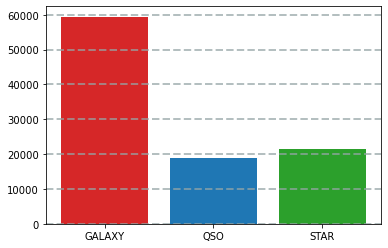

In [7]:
bar_colors = ['tab:red', 'tab:blue', 'tab:green']
plt.bar(np.unique(classeslabel),classesuniqcounts, color=bar_colors)
plt.grid(color='#95a5a6', linestyle='--', linewidth=2, axis='y', alpha=0.7)
plt.show()

# Standardization of data

In [8]:
data = np.array(df, dtype='float64')
data[0]

array([135.6891066 ,  32.49463184,  23.87882   ,  22.2753    ,
        20.39501   ,  19.16573   ,  18.79371   ,   0.6347936 ])

In [9]:
scaler = StandardScaler()
data = scaler.fit_transform(data)

In [10]:
data[0]

array([-0.43460358,  0.42552871,  0.0597546 ,  0.05492616,  0.40396155,
        0.0460074 ,  0.00393658,  0.07955728])

# Monty Carlo shuffling

In [11]:
shuffle = np.random.permutation(data.shape[0])
data_shuffled = data[shuffle,:]
classes_shuffled = classes[shuffle]

# Model creation here

In [12]:
ff_dim = 32
x = keras.layers.Input(data.shape[1])
y = keras.layers.Dense(ff_dim,activation='tanh')(x)
y = keras.layers.Dense(len(np.unique(classes)),
                        activation=keras.activations.softmax)(y)
model = keras.Model(x,y)

model.compile(optimizer=keras.optimizers.Adam(learning_rate=0.01),
loss=keras.losses.SparseCategoricalCrossentropy(),
metrics=keras.metrics.SparseCategoricalAccuracy())
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 8)]               0         
                                                                 
 dense (Dense)               (None, 32)                288       
                                                                 
 dense_1 (Dense)             (None, 3)                 99        
                                                                 
Total params: 387
Trainable params: 387
Non-trainable params: 0
_________________________________________________________________


2022-12-08 03:13:11.304482: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2022-12-08 03:13:11.304508: W tensorflow/stream_executor/cuda/cuda_driver.cc:269] failed call to cuInit: UNKNOWN ERROR (303)
2022-12-08 03:13:11.304532: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (jupyter-psw2i): /proc/driver/nvidia/version does not exist
2022-12-08 03:13:11.304762: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


# Model diagram

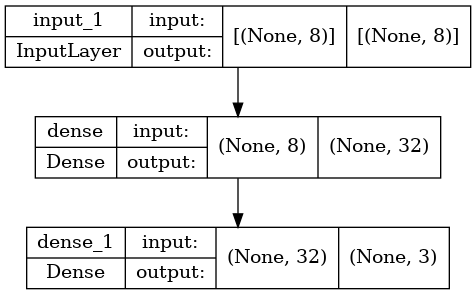

In [13]:
keras.utils.plot_model(model,show_shapes=True,expand_nested=True)

# Training the model

In [ ]:
history = model.fit(data,classes,
    validation_split=0.2,
    epochs=21,
    verbose=1)

Epoch 1/21
2500/2500 [==============================] - 2s 828us/step - loss: 0.1788 - sparse_categorical_accuracy: 0.9431 - val_loss: 0.1373 - val_sparse_categorical_accuracy: 0.9558
Epoch 2/21
2500/2500 [==============================] - 2s 778us/step - loss: 0.1363 - sparse_categorical_accuracy: 0.9584 - val_loss: 0.1342 - val_sparse_categorical_accuracy: 0.9548
Epoch 3/21
2500/2500 [==============================] - 2s 787us/step - loss: 0.1263 - sparse_categorical_accuracy: 0.9618 - val_loss: 0.1174 - val_sparse_categorical_accuracy: 0.9654
Epoch 4/21
2500/2500 [==============================] - 2s 787us/step - loss: 0.1218 - sparse_categorical_accuracy: 0.9631 - val_loss: 0.1147 - val_sparse_categorical_accuracy: 0.9669
Epoch 5/21
2500/2500 [==============================] - 2s 794us/step - loss: 0.1196 - sparse_categorical_accuracy: 0.9636 - val_loss: 0.1131 - val_sparse_categorical_accuracy: 0.9669
Epoch 6/21
2500/2500 [==============================] - 2s 779us/step - loss: 0.

# Plots showing the effects of training the model

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['Training','Validation'])
plt.xlabel('Epoch')
plt.ylabel('CCE Loss')
plt.show()

In [ ]:
plt.plot(history.history['sparse_categorical_accuracy'])
plt.plot(history.history['val_sparse_categorical_accuracy'])
plt.legend(['Training','Validation'])
plt.xlabel('Epoch')
plt.ylabel('Accuracy (P)')
plt.show()

In [ ]:
print("Validation accuracy:",*["%.8f"%(x) for x in history.history['val_sparse_categorical_accuracy'][0::10]])